In [1]:
import sys
import os
# Add the previous directory to path
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
# Use autoreload for any modification updates
%load_ext autoreload
%autoreload 1
%aimport atlas
from atlas import abc_mouse
from atlas import mouse_brain
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Allen Brain Cell Atlas (ABC) Mouse Datasets

- Allen Brain Cell Atlas (ABC) Mouse Single cell datasets
    - Yao et. al. (2023) :  Two large gene expression datasets and a Spatial Gene expression dataset
    - Zhang et. al. (2023) : Three Spatial Gene expresion datasets
- Current Focus: Yao et. al. (2023)  Spatial Transcriptomics Dataset
    - ~4.0 million cells.
    - 500 gene panel MERFESH dataset.
- Dataset source:
    - 59 coronal sections (10 micron thick) covering the whole anterior to posterior extent of the brain (~200 micron apart) from a single adult male mouse. 
- With MERFISH assay, each cell also has a set of x, y, z coordinates:
    - x and y generated by rotating each section so that it is upright with midline approximately in the middle of the frame.
    - z coordinate takes into account the physical spacing between each section

# Downloading data
- ABC data is stored in AWS data strore.
- In order to download the data, AWS CLI needs to be installed.
- __download_abc_data__ function is available in the abc_mouse package to download the necessary data.
- After setting the appropriate abc_mouse.ABC_BASE variable, **Uncomment** the last line in the cell below to download the data in the ABC_BASE directory.

In [3]:
# Downloading the necessary data
abc_mouse.ABC_BASE = "/storage/home/hhive1/schockalingam6/data2/airavata-cerebrum/brain_atlases/abc_mouse" # Change this to the directory to download
# abc_mouse.download_abc_data() # Uncomment to download data

expression_matrices/MERFISH-C57BL6J-638850/20230830 : 14.21 GB
metadata/MERFISH-C57BL6J-638850/20231215 : 1.81 GB
expression_matrices/MERFISH-C57BL6J-638850-sections/20230630 : 14.31 GB
expression_matrices/WMB-10Xv2/20230630 : 104.16 GB
expression_matrices/WMB-10Xv3/20230630 : 176.41 GB
expression_matrices/WMB-10XMulti/20230830 : 0.21 GB
metadata/WMB-10X/20231215 : 2.39 GB
metadata/WMB-taxonomy/20231215 : 0.01 GB
metadata/WMB-neighborhoods/20231215 : 3.00 GB
image_volumes/Allen-CCF-2020/20230630 : 0.37 GB
metadata/Allen-CCF-2020/20230630 : 0.00 GB
image_volumes/MERFISH-C57BL6J-638850-CCF/20230630 : 0.11 GB
metadata/MERFISH-C57BL6J-638850-CCF/20231215 : 2.01 GB
expression_matrices/Zhuang-ABCA-1/20230830 : 3.09 GB
metadata/Zhuang-ABCA-1/20231215 : 1.33 GB
metadata/Zhuang-ABCA-1-CCF/20230830 : 0.21 GB
expression_matrices/Zhuang-ABCA-2/20230830 : 1.30 GB
metadata/Zhuang-ABCA-2/20231215 : 0.57 GB
metadata/Zhuang-ABCA-2-CCF/20230830 : 0.08 GB
expression_matrices/Zhuang-ABCA-3/20230830 : 1.69

# Structure of a single cell Gene Expression dataset

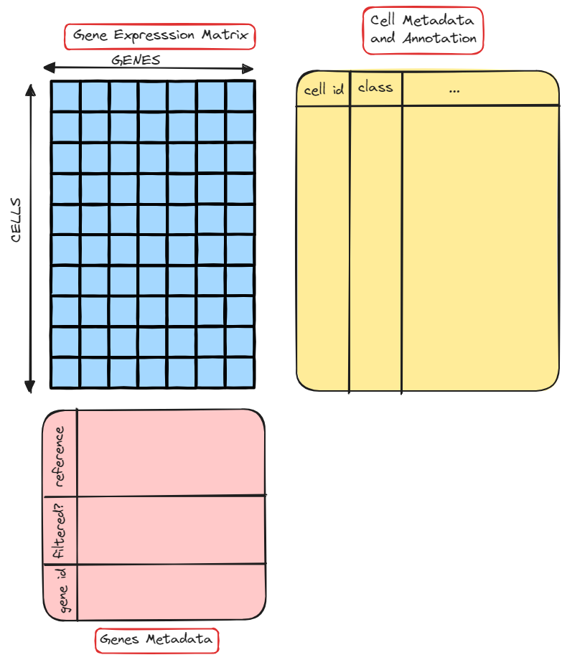

Gene expression datasets can be seen as composed of three tables :

- Gene Expression Data
- Cell meta data
   - Experiment: e.g. disease, organism, sex, donor, etc.
   - Region: e.g. layer, region, etc.
   - Stats & Analysis: e.g. ncounts, cell type, etc.
- Gene meta data
   - Avg. expression level, Is highly variable, etc.


In [2]:
# Load Cell metadata and Gene metadata 
manifest, file_meta = abc_mouse.merfish_files_meta()
cell_meta = abc_mouse.cell_metadata(file_meta)
gene_meta = abc_mouse.gene_metadata(file_meta)

## Whole Brain Taxonomy Data
The Allen Brain Cell Atlas includes an integrated transcriptomic taxonomy that contains
 - 5,322 clusters that are organized in a hierarchical manner
     - Top level of 34 classes
     - Second-level of 338 subclasses
     - Third-level of 1,201 supertypes and
     - Fourth-level of 5,322 types/clusters.

Example of classes:

     '01 IT-ET Glut',
     '02 NP-CT-L6b Glut',
     '03 OB-CR Glut',
     '04 DG-IMN Glut',
     '05 OB-IMN GABA',
     '06 CTX-CGE GABA',
     '07 CTX-MGE GABA',
     '08 CNU-MGE GABA',
     '09 CNU-LGE GABA'

### Exteneded Cell Metadata

- Load the taxonomy data for all the cells
- Extend the cell meta data to include the class, subclass and types information.


In [12]:
cluster_details, cluster_colors = abc_mouse.taxonomy_cluster(manifest)
cell_meta_ext = cell_meta.join(cluster_details, on="cluster_alias")
cell_meta_ext = cell_meta_ext.join(cluster_colors, on="cluster_alias")

## Allen Mouse CCF co-ordinates and parcellation
- Dataset source:
    - 59 coronal sections (10 micron thick) covering the whole anterior to posterior extent of the brain (~200 micron apart) from a single adult male mouse. 
- As mentioned in a MERFISH dataset, each cell also has a set of x, y, z coordinates.
- Allen Mouse Brain Common Coordinate Framework (CCFv3, Wang et al, 2020) is a 3D reference space of an average brain at 10um voxel resolution.
- Each section from the whole brain MERFISH dataset is mapped Allen CCFv3.
- Parcellaton division, structure and substructure are derived from the co-ordinates mapped to Allen CCF.

In [4]:
# Loading CCF Meta data
merfish_ccf_view_dir = abc_mouse.view_dir(manifest, "MERFISH-C57BL6J-638850-CCF")
cell_ccf = abc_mouse.cell_ccf_meta(os.path.join(merfish_ccf_view_dir, abc_mouse.PARCEL_META_DATA))
cell_ccf[abc_mouse.CCF_COLS]

class                  subclass  \
0        04 DG-IMN Glut         038 DG-PIR Ex IMN   
1             23 P Glut  235 PG-TRN-LRN Fat2 Glut   
2             23 P Glut  235 PG-TRN-LRN Fat2 Glut   
3             23 P Glut  235 PG-TRN-LRN Fat2 Glut   
4             23 P Glut  235 PG-TRN-LRN Fat2 Glut   
...                 ...                       ...   
3739956     33 Vascular               333 Endo NN   
3739957     33 Vascular               333 Endo NN   
3739958     33 Vascular               333 Endo NN   
3739959     33 Vascular               333 Endo NN   
3739960     33 Vascular               333 Endo NN   

                           supertype             cell_label  \
0               0141 DG-PIR Ex IMN_2  1019171907102340387-1   
1        0953 PG-TRN-LRN Fat2 Glut_1  1104095349101460194-1   
2        0953 PG-TRN-LRN Fat2 Glut_1    1017092617101450577   
3        0953 PG-TRN-LRN Fat2 Glut_1    1018093344101130233   
4        0953 PG-TRN-LRN Fat2 Glut_1    1019171912201610094   
...                              ...                    ...   
3739956               1193 Endo NN_1  1018093344100380167-3   
3739957               1193 Endo NN_1    1017165415100930567   
3739958               1193 Endo NN_1    1017155956102610748   
3739959               1193 Endo NN_1  1017155956101980080-1   
3739960               1193 Endo NN_1  1018093344102220578-3   

        parcellation_division parcellation_structure  \
0                         HPF                     DG   
1                           P                    TRN   
2                           P           P-unassigned   
3                         cbf                    arb   
4                           P           P-unassigned   
...                       ...                    ...   
3739956             Isocortex                  SSp-n   
3739957             Isocortex                   ACAd   
3739958             Isocortex                  SSp-m   
3739959             Isocortex                    SSs   
3739960                    HY          HY-unassigned   

        parcellation_substructure      x_ccf     y_ccf     z_ccf  
0                           DG-po   7.495417  2.445872  7.455066  
1                             TRN   9.227966  6.133693  5.225024  
2                    P-unassigned   9.344912  6.989939  6.002664  
3                             arb  10.977068  4.398568  3.305223  
4                    P-unassigned   8.997138  6.798329  5.827197  
...                           ...        ...       ...       ...  
3739956                  SSp-n2/3   5.321669  2.575568  1.694437  
3739957                     ACAd5   3.493405  2.016746  5.317544  
3739958                   SSp-m6a   4.994629  2.542668  2.773582  
3739959                      SSs1   4.611080  4.157295  1.459526  
3739960             HY-unassigned   7.343453  5.416893  6.386752  

[3739961 rows x 10 columns]

## Region Specific Ratios
- Inhibitory types are : 'Vip', 'Pvalb', 'SSt', 'Lamp5', 'Sst-Chodl', 'GABA-Other' (Inhibitory cells that are not one of Vip, Pvalb, SSt, SST-Chodl)
- Exitatory types are :  "IT", "ET", "CT", "NP", "Glut-Other"(Excitatory cells that are not one of IT, ET, CT or NP)
- IT types are further classified as "IT-CTX","IT-ENT" and "IT-Other"
- Based on the parcelletion information of the Allen CCF to find the layer specific ratios using _region_ccf_cell_types_ function
- First, we get data frame with flags set indicating the cell types and cell sub-types from the meta data
- Next, we group by the layers in sub-region to obtain summary statistics
- Finally, we compute the ratios in each layer 
- The above three steps is computed for each layer and merge all the data

In [9]:
# Obtain Region Specific CCF
region_cell_ccf, region_ei_ccf = abc_mouse.region_ccf_cell_types(cell_ccf, ["MOp", "MOs", "AUDp", "AUDd", "VISp", "VISl"])
# Merge the data 
cortex_ei_df = pd.concat([y for x,y in region_ei_ccf.items()])
cortex_ei_df

E     I      O  GABA  Sst  Lamp5  Sst-Chodl  \
parcellation_substructure                                                    
MOp1                         544   732   5463   732   36    506         12   
MOp2/3                     21206  3262   9309  3262  708    477         22   
MOp5                       11131  2084   6137  2084  859    104         30   
MOp6a                      14721  1574   5587  1573  577    151         44   
MOp6b                       1339    79    808    79   17     14          9   
MOs1                         989  1018   8294  1018   52    659          7   
MOs2/3                     24302  3884  10003  3884  862    487         20   
MOs5                       12219  2558   6801  2558  990    141         23   
MOs6a                      12876  1479   5655  1479  511    122         30   
MOs6b                        385    24    372    24    2      6          4   
AUDp1                        156   146   1156   146    4    104          0   
AUDp2/3                     3778   403   1177   403   78     48          0   
AUDp4                       1715   284    793   284   86     10          1   
AUDp5                       1887   431   1050   431  157     20          2   
AUDp6a                      1678   124    436   124   47      6          1   
AUDp6b                       300    27    118    27    6      5          1   
AUDd1                         62    65    697    65    1     50          0   
AUDd2/3                     2116   261    615   261   57     25          3   
AUDd4                        714   122    305   122   38      9          0   
AUDd5                        780   176    420   176   67     14          0   
AUDd6a                      1208   101    350   101   54      5          2   
AUDd6b                       200     5     95     5    1      1          0   
VISp1                        577   393   3341   393   14    283          3   
VISp2/3                    16400  1402   3772  1402  227    222          3   
VISp4                       9443  1190   2344  1190  375     22          0   
VISp5                       6962  1380   2649  1380  629     31          9   
VISp6a                      8181   548   1399   548  191     14          6   
VISp6b                      1432    80    391    80   22      7          6   
VISl1                         77    80    590    80    0     59          0   
VISl2/3                     2568   296    698   296   44     60          0   
VISl4                       1406   219    475   219   79      3          0   
VISl5                       1334   306    531   306  133      5          2   
VISl6a                      1591   125    289   125   42     11          2   
VISl6b                       355    19     90    19    6      2          1   

                           Pvalb  Vip  GABA-Other  ...  Sst-Chodl fraction  \
parcellation_substructure                          ...                       
MOp1                          20   99          59  ...            0.016393   
MOp2/3                      1194  734         127  ...            0.006744   
MOp5                         910  137          44  ...            0.014395   
MOp6a                        631   71          99  ...            0.027972   
MOp6b                         15    5          19  ...            0.113924   
MOs1                          46  153         101  ...            0.006876   
MOs2/3                      1365  982         168  ...            0.005149   
MOs5                        1207  158          39  ...            0.008991   
MOs6a                        597  101         118  ...            0.020284   
MOs6b                          2    1           9  ...            0.166667   
AUDp1                          4   16          18  ...            0.000000   
AUDp2/3                      153  109          15  ...            0.000000   
AUDp4                        160   17          10  ...            0.003521   
AUDp5                        201   27          24  .

## Ratio data
- Ratio data is made available as a data frame with the columns indicating the fractions
- Key columns are
    1. 'fraction wi. region' : Fraction of cells in this layer within this region
    2. 'inhibitory fraction' : Fraction of cells that re inhibitory
    3. 'Vip fraction' : Among the inhibitory cells, fraction of Vip cells
    4. 'Lamp5 fraction' : Among the inhibitory cells, fraction of Lamp5 cells
    5. 'Sst-Chodl fraction' : Among the inhibitory cells, fraction of Sst-Chodl cells
    6. 'GABA Other fraction' : Among the inhibitory cells, fraction of cells that is none of Vip, Lamp5, SSt, SSt-Chodl
    7. 'IT fraction': Among the excitatory cells, fraction of cells that are intratelencephalic projecting.
    8. 'ET fraction': Among the excitatory cells, fraction of cells that are extratelencephalic projecting.
    9. 'CT fraction': Among the excitatory cells, fraction of cells that are corticothalamic
    10. 'NP fraction': Among the excitatory cells, fraction of cells that are non-projecting
    11. 'Glut Other fraction': Among the excitatory cells, fraction of cells that are not one of IT, ET, CT or NP
    12. 'IT-CTX fraction', 'IT-ENT fraction', 'IT-Other fraction' : Fraction of cells among the IT cell types

In [10]:
fraction_cols = ['inhibitory fraction', 'fraction wi. region', 'Vip fraction',
       'Pvalb fraction', 'SSt fraction', 'Lamp5 fraction',
       'Sst-Chodl fraction', 'GABA Other fraction','IT fraction', 'ET fraction',
       'CT fraction', 'NP fraction', 'Glut Other fraction']
cortex_ei_df.loc[cortex_ei_df.Region == "VISp"][fraction_cols]

inhibitory fraction  fraction wi. region  \
parcellation_substructure                                             
VISp1                                 0.405155             0.069663   
VISp2/3                               0.078755             0.348620   
VISp4                                 0.111916             0.209699   
VISp5                                 0.165428             0.177606   
VISp6a                                0.062779             0.163661   
VISp6b                                0.052910             0.030751   

                           Vip fraction  Pvalb fraction  SSt fraction  \
parcellation_substructure                                               
VISp1                          0.147583        0.038168      0.035623   
VISp2/3                        0.316690        0.332382      0.161912   
VISp4                          0.131933        0.532773      0.315126   
VISp5                          0.021739        0.487681      0.455797   
VISp6a                         0.038321        0.562044      0.348540   
VISp6b                         0.037500        0.475000      0.275000   

                           Lamp5 fraction  Sst-Chodl fraction  \
parcellation_substructure                                       
VISp1                            0.720102            0.007634   
VISp2/3                          0.158345            0.002140   
VISp4                            0.018487            0.000000   
VISp5                            0.022464            0.006522   
VISp6a                           0.025547            0.010949   
VISp6b                           0.087500            0.075000   

                           GABA Other fraction  IT fraction  ET fraction  \
parcellation_substructure                                                  
VISp1                                 0.050891     0.989601     0.000000   
VISp2/3                               0.028531     1.000000     0.000000   
VISp4                                 0.001681     0.962618     0.029334   
VISp5                                 0.005797     0.521258     0.323039   
VISp6a                                0.014599     0.215988     0.000611   
VISp6b                                0.050000     0.046788     0.000000   

                           CT fraction  NP fraction  Glut Other fraction  
parcellation_substructure                                                 
VISp1                         0.000000     0.000000             0.010399  
VISp2/3                       0.000000     0.000000             0.000000  
VISp4                         0.000212     0.007413             0.000424  
VISp5                         0.043953     0.104137             0.007613  
VISp6a                        0.759320     0.005378             0.018702  
VISp6b                        0.725559     0.000000             0.227654

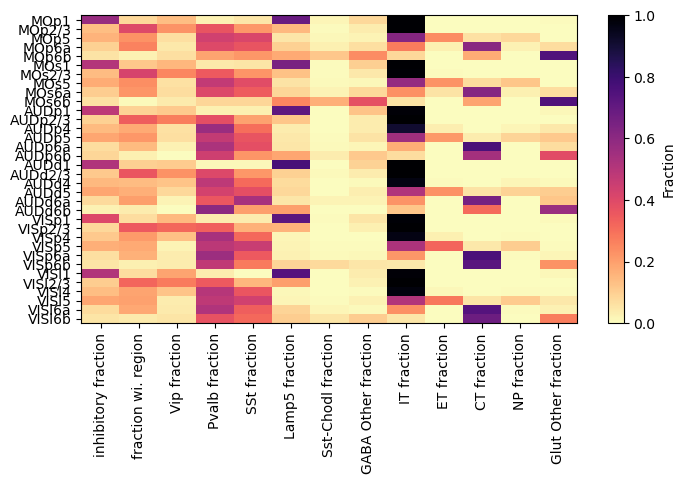

In [11]:
abc_mouse.plot_heatmap(cortex_ei_df[fraction_cols], ylabel="Fraction", lmin=0, lmax=1)